In [ ]:
# import library
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Settings
duration_minutes = 120
sampling_rate_hz = 100
num_samples = duration_minutes * 60 * sampling_rate_hz


In [ ]:
# Start time
start_time = datetime.datetime.now()


In [ ]:
# Initialize lists to store data
timestamps = []
cpu_temperatures = []
cpu_usages = []
cpu_loads = []
memory_usages = []
battery_levels = []
cpu_powers = []


In [ ]:
# Collect data
for i in range(num_samples):
    try:
        # Get current time
        current_time = start_time + datetime.timedelta(seconds=i/sampling_rate_hz)
        timestamps.append(current_time)

        # Generate synthetic data
        cpu_temperature = np.random.normal(loc=50, scale=10)
        cpu_usage = np.random.uniform(0, 100)
        cpu_load = np.random.uniform(0, 10)
        memory_usage = np.random.uniform(0, 100)
        battery_level = np.random.uniform(0, 100)
        cpu_power = np.random.uniform(0, 100)

        cpu_temperatures.append(cpu_temperature)
        cpu_usages.append(cpu_usage)
        cpu_loads.append(cpu_load)
        memory_usages.append(memory_usage)
        battery_levels.append(battery_level)
        cpu_powers.append(cpu_power)

        # Introduce anomalies randomly (e.g., 10% chance)
        if np.random.rand() < 0.1:
            # Introduce high CPU usage
            cpu_usages[-1] = np.random.uniform(90, 100)

            # Introduce high temperature
            cpu_temperatures[-1] = np.random.uniform(90, 105)

            # Introduce high memory usage
            memory_usages[-1] = np.random.uniform(95, 100)

            # Introduce low battery level
            battery_levels[-1] = np.random.uniform(0, 10)

            # Introduce high CPU power
            cpu_powers[-1] = np.random.uniform(50, 100)

    except Exception as e:
        print(f"Error collecting data: {e}")


In [ ]:
# Create DataFrame
data = {
    'timestamp': timestamps,
    'cpu_temperature': cpu_temperatures,
    'cpu_usage': cpu_usages,
    'cpu_load': cpu_loads,
    'memory_usage': memory_usages,
    'battery_level': battery_levels,
    'cpu_power': cpu_powers
}
df_real = pd.DataFrame(data)


In [ ]:
# Save to CSV in append mode
df_real.to_csv(r'C:\Users\Admin\Downloads\TSADSD-main\hardware_monitor_data.csv', mode='a', index=False)


In [ ]:
# Display the first few rows of the DataFrame
print(df_real.head())


                   timestamp  cpu_temperature  cpu_usage  cpu_load  \
0 2024-11-30 04:03:40.005978        56.738699  28.214774  9.051959   
1 2024-11-30 04:03:40.015978        46.760913  73.907744  7.993585   
2 2024-11-30 04:03:40.025978        42.529389  46.744889  8.486199   
3 2024-11-30 04:03:40.035978        50.078429  84.756849  1.802062   
4 2024-11-30 04:03:40.045978        53.012281  59.492501  8.771137   

   memory_usage  battery_level  cpu_power  
0     59.479296      62.661562  17.666761  
1     41.317296      15.210028  31.487601  
2     66.019837      45.640938   1.021084  
3     44.856828      43.652730  19.120080  
4     48.291896      47.934784  32.017339  


In [ ]:

# Convert 'timestamp' column to numerical representation
df_real['timestamp'] = pd.to_datetime(df_real['timestamp'])
df_real['timestamp'] = df_real['timestamp'].apply(lambda x: x.timestamp())


In [ ]:
# Apply the Isolation Forest anomaly detection algorithm
iforest = IsolationForest(contamination=0.1)
anomaly_scores = iforest.fit_predict(df_real)


In [ ]:
# Identify anomalies
anomalies = df_real[anomaly_scores == -1]


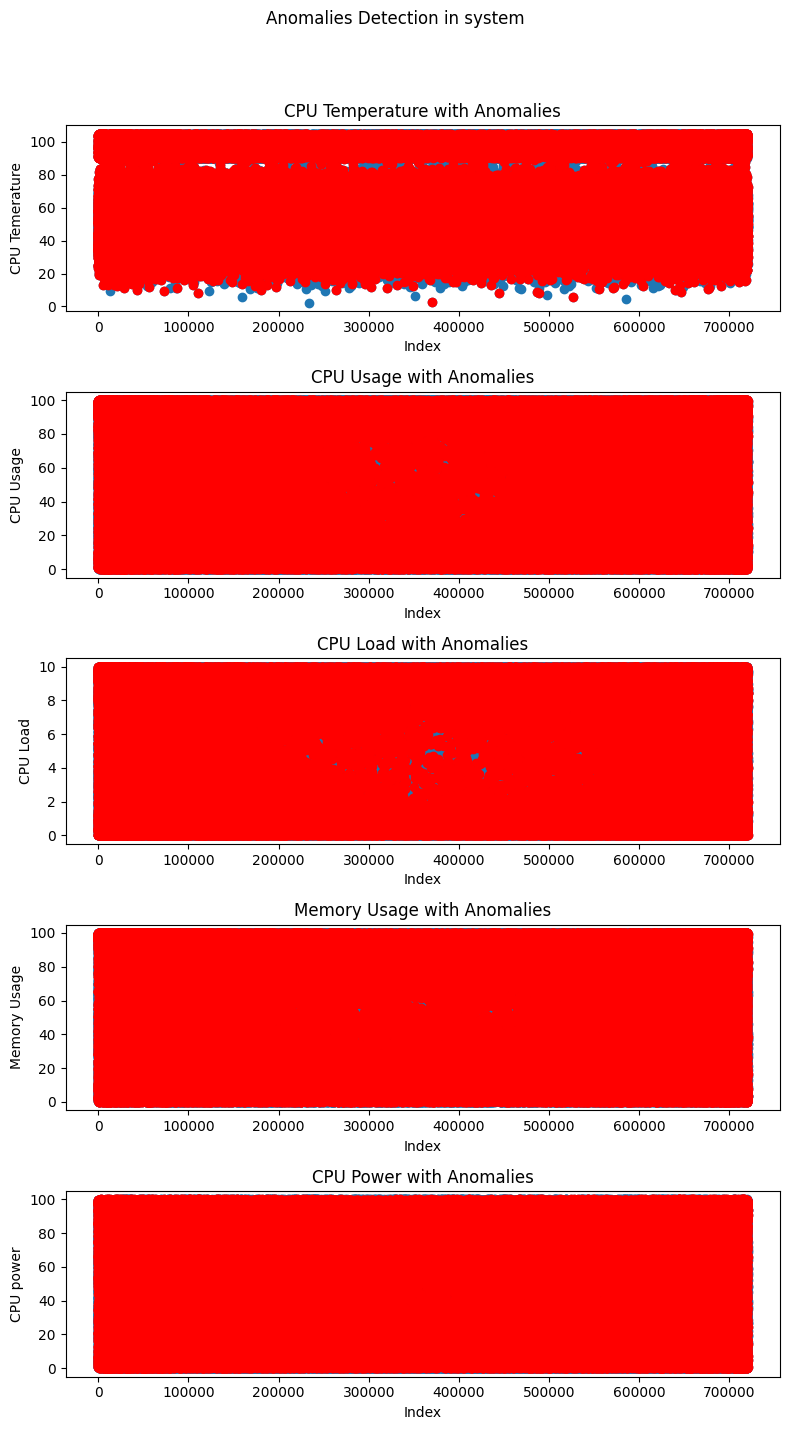

In [ ]:
# Plot the anomalies
# Create a figure with 5 subplots
fig,axs = plt.subplots(5, figsize=(8,15))
# set the titles for the entire fugure
fig.suptitle('Anomalies Detection in system')

# Plot cpu _temperatures with anomalies highlighted
axs[0].scatter(df_real.index, df_real['cpu_temperature'], label='Normal data')
axs[0].scatter(anomalies.index, anomalies['cpu_temperature'], label='Anomalies', color='red')
axs[0].set_title('CPU Temperature with Anomalies')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('CPU Temerature')

# Plot cpu_usages with anomalies highlighted
axs[1].scatter(df_real.index, df_real['cpu_usage'], label='Normal data')
axs[1].scatter(anomalies.index, anomalies['cpu_usage'], label='Anomalies', color='red')
axs[1].set_title('CPU Usage with Anomalies')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('CPU Usage')

#Plot cpu_load with anomalies highlighted
axs[2].scatter(df_real.index, df_real['cpu_load'],label='Normal data')
axs[2].scatter(anomalies.index, anomalies['cpu_load'], label='Anomaliess', color='red')
axs[2].set_title('CPU Load with Anomalies')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('CPU Load')

# Plot cpu memory_usage with anomalies highlighted
axs[3].scatter(df_real.index, df_real['memory_usage'], label='Normal data')
axs[3].scatter(anomalies.index, anomalies['memory_usage'], label='Anomalies', color='red')
axs[3].set_title('Memory Usage with Anomalies')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Memory Usage')

# Plot cpu_power with anomalies highlighted
axs[4].scatter(df_real.index, df_real['cpu_power'], label='Normal data')
axs[4].scatter(anomalies.index, anomalies['cpu_power'], label='Anomalies', color='red')
axs[4].set_title('CPU Power with Anomalies')
axs[4].set_xlabel('Index')
axs[4].set_ylabel('CPU power')

# Layout so plots do not overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()